# SUPERMARKET DATA PROJECT PREDICTIVE MODEL NOTEBOOK

# PROJECT DESCRIPTION


This is an Intermediate cohort mini-project for the A4Ayub data labs http://a4ayub.me/site/


### Aim Of The Project
To predict at which store region a customer is likely to shop

### Problem Statement
This Lab illustrates what we have covered during the lab session:
1. Descriptive Statistics
2. Inferential Statistics
3. Visualisation
4. Modelling
5. Prediction
6. Intepretation of Results

### About The Data
This data is proprietory and can only be shared to Ayub, A4Ayub Data Science Labs.!  (http://www.a4ayub.me/)

### Data Description
Each row in the dataset corresponds to one unique product in a basket (e.g. if there are three occurences of the
same product in that basket, it will have one row for the product in that basket, with quantity equal to three)

The file has the below structure:

### Data Structure
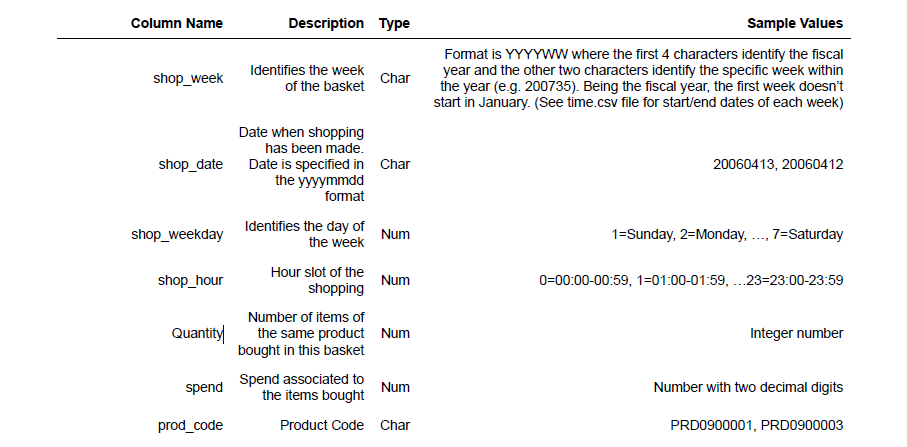

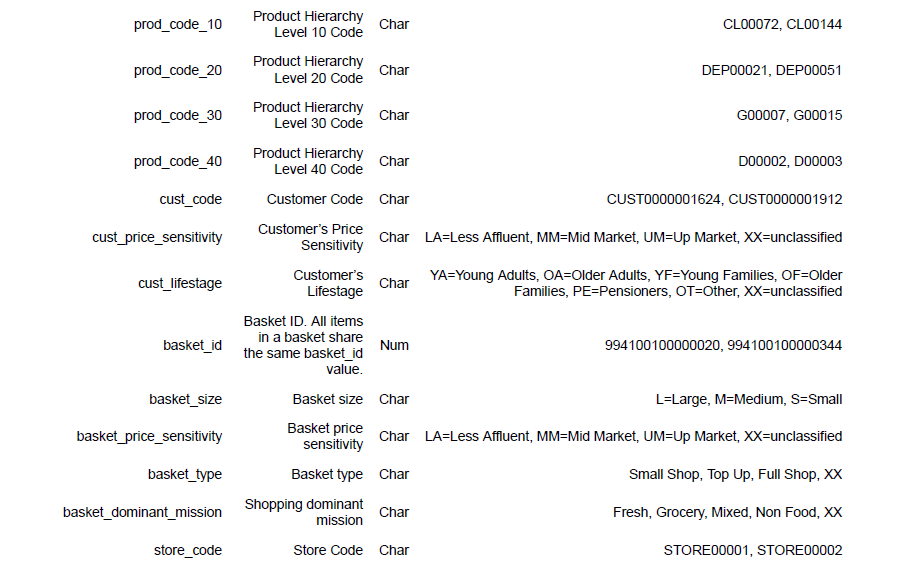

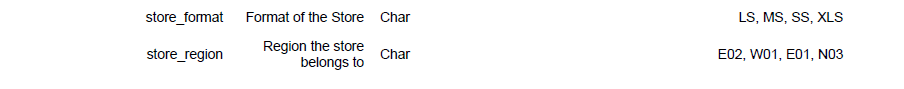

# LET'S EXPLORE

# Importing Packages

In [34]:
#importing packages
import pandas as pd
import numpy as np
 

#importing visualization metrics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline 

# Import the warnings
import warnings

# Import statsmodels
import statsmodels.formula.api as smf

# Importing classifiers from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the metrics
from sklearn.metrics import confusion_matrix

# configuration settings
%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore') ## Surpress the warnings
pd.options.display.max_columns = None # Display all columns

# For Statistics
import scipy.stats as stats
import pandas_profiling as pp
#other packages
import math
from collections import Counter
from numpy import log

# Importing Data

In [2]:
dataset =  pd.read_csv("supermarket_dataset_used.csv")

# EXPLORATORY DATA ANALYSIS

## 1. General Analysis

In [3]:
# viewing the top 5 rows of the dataset

dataset.head()

,SHOP_WEEK,Year,Month,Date,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,2006,4,13,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,D00001,CUST0000634693,LA,YF,994100000000000,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,2006,4,12,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,D00002,CUST0000634693,LA,YF,994100000000000,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,2006,4,13,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,D00003,CUST0000634693,LA,YF,994100000000000,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,2006,4,12,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,D00001,CUST0000634693,LA,YF,994100000000000,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,2006,4,13,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,D00002,CUST0000634693,LA,YF,994100000000000,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [4]:
#getting the statistics and summary of the whole dataset

pp.ProfileReport(dataset)

In [5]:
#variables in the dataset

dataset.columns

Index(['SHOP_WEEK', 'Year', 'Month', 'Date', 'SHOP_WEEKDAY', 'SHOP_HOUR',
       'QUANTITY', 'SPEND', 'PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20',
       'PROD_CODE_30', 'PROD_CODE_40', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY',
       'CUST_LIFESTAGE', 'BASKET_ID', 'BASKET_SIZE',
       'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE', 'BASKET_DOMINANT_MISSION',
       'STORE_CODE', 'STORE_FORMAT', 'STORE_REGION'],
      dtype='object')

In [6]:
# checking the datatypes

dataset.dtypes

SHOP_WEEK                    int64
Year                         int64
Month                        int64
Date                         int64
SHOP_WEEKDAY                 int64
SHOP_HOUR                    int64
QUANTITY                     int64
SPEND                        int64
PROD_CODE                   object
PROD_CODE_10                object
PROD_CODE_20                object
PROD_CODE_30                object
PROD_CODE_40                object
CUST_CODE                   object
CUST_PRICE_SENSITIVITY      object
CUST_LIFESTAGE              object
BASKET_ID                    int64
BASKET_SIZE                 object
BASKET_PRICE_SENSITIVITY    object
BASKET_TYPE                 object
BASKET_DOMINANT_MISSION     object
STORE_CODE                  object
STORE_FORMAT                object
STORE_REGION                object
dtype: object

In [7]:
#Total number of rows and columns
#We have 119 rows and 24 columns

dataset.shape

(119, 24)

In [8]:
# Rows containing duplicate data

duplicate_rows = dataset[dataset.duplicated()]
print("Duplicate rows: ",duplicate_rows)

Duplicate rows:  Empty DataFrame
Columns: [SHOP_WEEK, Year, Month, Date, SHOP_WEEKDAY, SHOP_HOUR, QUANTITY, SPEND, PROD_CODE, PROD_CODE_10, PROD_CODE_20, PROD_CODE_30, PROD_CODE_40, CUST_CODE, CUST_PRICE_SENSITIVITY, CUST_LIFESTAGE, BASKET_ID, BASKET_SIZE, BASKET_PRICE_SENSITIVITY, BASKET_TYPE, BASKET_DOMINANT_MISSION, STORE_CODE, STORE_FORMAT, STORE_REGION]
Index: []


In [9]:
#code to delete dupicates if we have any
#datset=dataset.drop_duplicates()

In [10]:
#The count of each column
# CUST_CODE, CUST_PRICE_SENSITIVITY and CUST_LIFESTAGE have missing values

dataset.count()

SHOP_WEEK                   119
Year                        119
Month                       119
Date                        119
SHOP_WEEKDAY                119
SHOP_HOUR                   119
QUANTITY                    119
SPEND                       119
PROD_CODE                   119
PROD_CODE_10                119
PROD_CODE_20                119
PROD_CODE_30                119
PROD_CODE_40                119
CUST_CODE                    73
CUST_PRICE_SENSITIVITY       73
CUST_LIFESTAGE               73
BASKET_ID                   119
BASKET_SIZE                 119
BASKET_PRICE_SENSITIVITY    119
BASKET_TYPE                 119
BASKET_DOMINANT_MISSION     119
STORE_CODE                  119
STORE_FORMAT                119
STORE_REGION                119
dtype: int64

In [11]:
#lokking for columns with missing values

dataset.isnull().sum()

SHOP_WEEK                    0
Year                         0
Month                        0
Date                         0
SHOP_WEEKDAY                 0
SHOP_HOUR                    0
QUANTITY                     0
SPEND                        0
PROD_CODE                    0
PROD_CODE_10                 0
PROD_CODE_20                 0
PROD_CODE_30                 0
PROD_CODE_40                 0
CUST_CODE                   46
CUST_PRICE_SENSITIVITY      46
CUST_LIFESTAGE              46
BASKET_ID                    0
BASKET_SIZE                  0
BASKET_PRICE_SENSITIVITY     0
BASKET_TYPE                  0
BASKET_DOMINANT_MISSION      0
STORE_CODE                   0
STORE_FORMAT                 0
STORE_REGION                 0
dtype: int64

## 2. Exploring The Target Variable

The objective is to learn more about the target varibale which is the store region. This is through visualization and conducting description analysis

In [12]:
#viewing the top 5 of the store region variable

store_region_data = dataset["STORE_REGION"]
store_region_data.head()

0    E02
1    E02
2    E02
3    E02
4    E02
Name: STORE_REGION, dtype: object

In [13]:
# the store regions available
# We have 9 store regions

available_store_regions = store_region_data.unique()
available_store_regions

array(['E02', 'W01', 'N01', 'N02', 'W02', 'S02', 'S01', 'N03', 'S03'],
      dtype=object)

In [14]:
# finding out the distribution of the number the customers bought in those store regions
#the classes are quite imbalanced

dataset["STORE_REGION"].value_counts()

N01    21
W01    17
N02    16
S01    15
N03    14
E02    12
W02     9
S03     8
S02     7
Name: STORE_REGION, dtype: int64

In [15]:
#preparing data for visualization to show the distribution of the number the customers bought in those store regions

available_store_regions_visualization_data = dataset["STORE_REGION"].value_counts().rename_axis("STORE_REGION").reset_index(name="COUNT")
available_store_regions_visualization_data

,STORE_REGION,COUNT
0,N01,21
1,W01,17
2,N02,16
3,S01,15
4,N03,14
5,E02,12
6,W02,9
7,S03,8
8,S02,7


<BarContainer object of 9 artists>

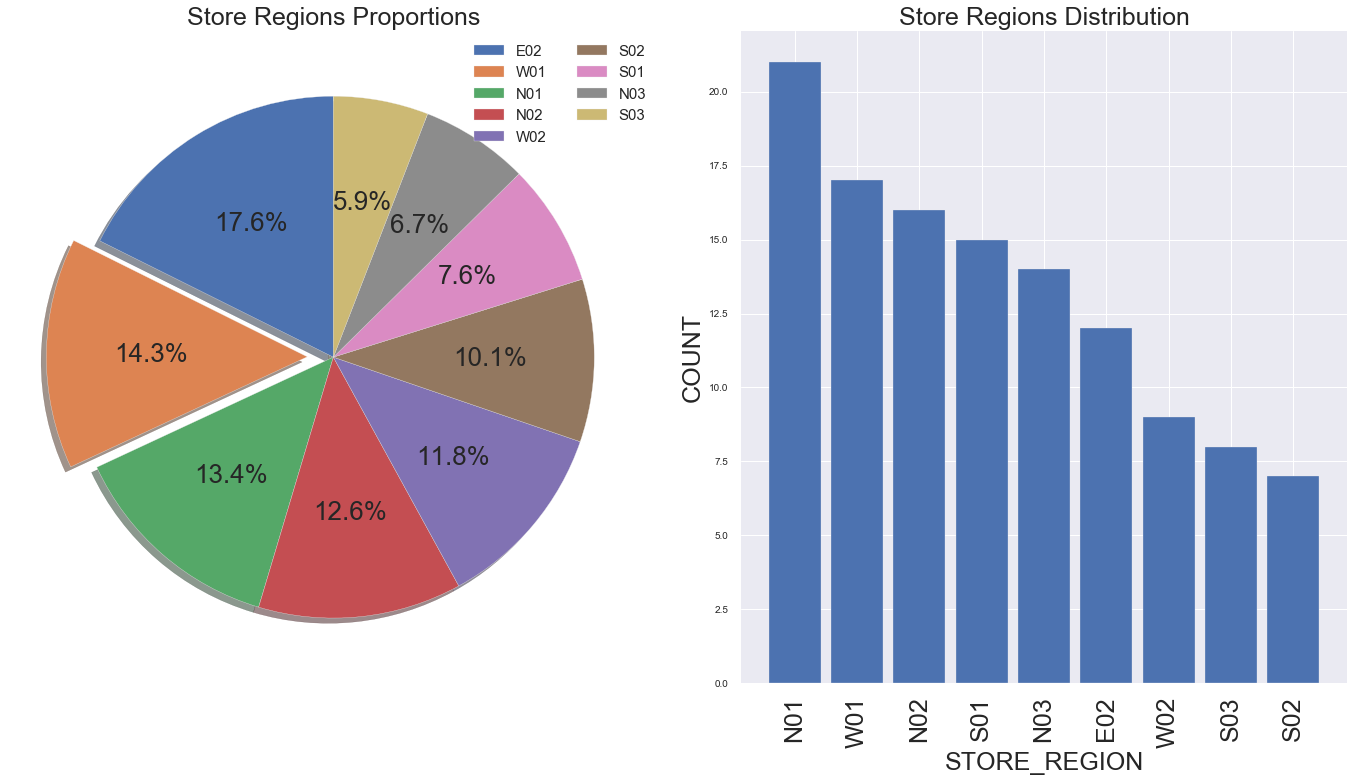

In [16]:
#visualization to show the distribution of the number the customers bought in those store regions
#Create a the top level element for all the plot elements by defining its width of 25 and height 12

fig = plt.figure(figsize=(25,12))


# Define a gridspec which will specify the geometry within which a subpot will be configure
# This will have 7 rows and 9 columns

gs = gridspec.GridSpec(7,9)


# In the above gridSpec we will have two columns: One to display the pie-chart and the other to disply a bar-chart
# Define the subplot where you will have the pie chart

pie_subplot = plt.subplot(gs[:, :-4]) # From the Top to Last Row; From First Column to Fifth column

# define the subplot where you will have the bar chart

bar_subplot = plt.subplot(gs[:, 5:])

# Draw the pie Chart
# store regions as labels

pie_labels = 'E02', 'W01', 'N01', 'N02', 'W02', 'S02', 'S01', 'N03', 'S03' 

 # explode the pie chart at region N01
    
pie_explode = (0,0.1,0,0,0,0,0,0,0)

# Setting the title of the pie plot

pie_subplot.set_title(label='Store Regions Proportions', fontdict={'fontsize': 25})

#plotting the pie graph

pie_subplot.pie(
    available_store_regions_visualization_data["COUNT"],
    explode=pie_explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    textprops={"fontsize":26}
)

#Adding a legend to the pie graph

pie_subplot.legend(pie_labels,loc=0,fontsize=15,ncol=2) 

# plotting the bar chart
#specifying the x axis
bar_list = available_store_regions_visualization_data["STORE_REGION"]

#specifying the y axis
bar_count = available_store_regions_visualization_data["COUNT"]

#arange from one with higher count to the one with the least
index_values = np.arange(len(bar_list))

#specifying the width of the space between the bars
width = 1/1.2

#setting the title
bar_subplot.set_title(label='Store Regions Distribution', fontdict={'fontsize': 25})

#setting the xlabel and ylabel
bar_subplot.set_xlabel(xlabel="STORE_REGION",fontdict={'fontsize':25})
bar_subplot.set_ylabel(ylabel="COUNT",fontdict={'fontsize':25})

#specisfying if the x axis labels will be executed horizontally or vertically
bar_subplot.set_xticklabels(bar_list,rotation="vertical",fontdict={'fontsize':25})

#plotting the graph
bar_subplot.bar(bar_list,bar_count,width)

From the visualization above we notice that the distribution of the number of customers is not the same in each region.
Let's calculate to find out if the count of the number of customers is balanced. That is we are looking how "badly unbalanced" our target variable is.
Here I use shannon enthropy as a measure of balance.

#### Shannon Enthropy Formula

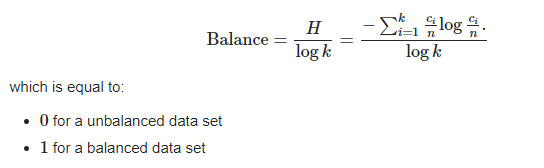

https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance

In [17]:
def balance_calculator(variable, unit = "Natural"): #We set Nutural as a default
    #setting the metrics of unit
    base = {
        'shannon' : 2.,
        'natural' : math.exp(1),
        'hartley' : 10.
    }
    
    #lets specify if the length of one or less the function returns zero
    if len(variable)<=1:
        return 0
    
    #intializing count
    counts = Counter()
    for d in variable:
        counts[d] += 1
    ent = 0
    probs = [float(c) / len(variable) for c in counts.values()]
    for p in probs:
        if p > 0.:
            ent -= p * math.log(p, base[unit])
    return ent/math.log(len(variable))
    

In [18]:
#checking for balance
#our value is 0.6464584943366048 so we can just continue to the model
balance_value = balance_calculator(dataset["STORE_REGION"], "shannon")
balance_value

0.6464584943366048

## 3. Exploring The Model Variables With Respect To The Target Variable

## Variables To Be Used To Create The Model:

           Date
           QUANTITY
           SPEND
           SHOP_WEEKDAY
           SHOP_HOUR
           PROD_CODE_10
           CUST_PRICE_SENSITIVITY
           CUST_LIFESTAGE
           BASKET_SIZE
           BASKET_DOMINANT_MISSION
           STORE_FORMAT

In [19]:
# Extracting Data to be used in exploration
dataset_for_exploration = dataset[["Date", "QUANTITY", "SPEND", "SHOP_WEEKDAY" ,"SHOP_HOUR",  "PROD_CODE_10", "CUST_PRICE_SENSITIVITY", "CUST_LIFESTAGE","BASKET_SIZE","BASKET_DOMINANT_MISSION", "STORE_FORMAT", "STORE_REGION"]]
#viewing the data
dataset_for_exploration.head()

,Date,QUANTITY,SPEND,SHOP_WEEKDAY,SHOP_HOUR,PROD_CODE_10,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_SIZE,BASKET_DOMINANT_MISSION,STORE_FORMAT,STORE_REGION
0,13,1,103,5,20,CL00001,LA,YF,L,Fresh,LS,E02
1,12,1,28,4,19,CL00070,LA,YF,M,Fresh,LS,E02
2,13,3,84,5,20,CL00167,LA,YF,L,Fresh,LS,E02
3,12,1,221,4,19,CL00010,LA,YF,M,Fresh,LS,E02
4,13,1,334,5,20,CL00073,LA,YF,L,Fresh,LS,E02


## Preparing data for Visualization

### Step One: Deal With The Missing Values

In [20]:
#finding missing values
dataset_for_exploration.isnull().sum()

Date                        0
QUANTITY                    0
SPEND                       0
SHOP_WEEKDAY                0
SHOP_HOUR                   0
PROD_CODE_10                0
CUST_PRICE_SENSITIVITY     46
CUST_LIFESTAGE             46
BASKET_SIZE                 0
BASKET_DOMINANT_MISSION     0
STORE_FORMAT                0
STORE_REGION                0
dtype: int64

In [21]:
#exploring data with missing values
#CUST_PRICE_SENSITIVITY
#From the dataset description there is a category called XX which mean unclassified so we replave the nan with XX 
CUST_PRICE_SENSITIVITY_DATA = dataset_for_exploration["CUST_PRICE_SENSITIVITY"].unique()
CUST_PRICE_SENSITIVITY_DATA

array(['LA', 'MM', nan, 'UM'], dtype=object)

In [22]:
#exploring data with missing values
#CUST_LIFESTAGE
#From the dataset description there is a category called XX which mean unclassified so we replave the nan with XX 
CUST_LIFESTAGE_DATA = dataset_for_exploration["CUST_LIFESTAGE"].unique()
CUST_LIFESTAGE_DATA

array(['YF', 'OT', nan, 'OA', 'OF', 'YA'], dtype=object)

In [23]:
# replacing nan with XX in CUST_LIFESTAGE
dataset_for_exploration["CUST_PRICE_SENSITIVITY"].fillna("XX",inplace=True)

In [24]:
# replacing nan with XX in CUST_LIFESTAGE
dataset_for_exploration["CUST_LIFESTAGE"].fillna("XX",inplace=True)

In [25]:
# Check if we still have nulls
dataset_for_exploration.isnull().sum()

Date                       0
QUANTITY                   0
SPEND                      0
SHOP_WEEKDAY               0
SHOP_HOUR                  0
PROD_CODE_10               0
CUST_PRICE_SENSITIVITY     0
CUST_LIFESTAGE             0
BASKET_SIZE                0
BASKET_DOMINANT_MISSION    0
STORE_FORMAT               0
STORE_REGION               0
dtype: int64

### Step Two: Replace With The Actual Names For The Variables

In [26]:
#replace data point in CUST_PRICE_SENSITIVITY
customer_price_sensitivity_dict = {"LA" : "Less Affluent","MM" : "Mid Market", "UM" : "Up Market","XX":"unclassified"}

# Replace the values
dataset_for_exploration["CUST_PRICE_SENSITIVITY"].replace(customer_price_sensitivity_dict, inplace=True)

# Display the data
dataset_for_exploration["CUST_PRICE_SENSITIVITY"].unique()

array(['Less Affluent', 'Mid Market', 'unclassified', 'Up Market'],
      dtype=object)

In [27]:
#replace data point in CUST_LIFESTAGE
customer_price_sensitivity_dict = {"YA":"Young Adults", "OA":"Older Adults", "YF":"Young Families", 
                                   "OF":"Older Families", "PE":"Pensioners", "OT":"Other", "XX":"unclassified"}

# Replace the values
dataset_for_exploration["CUST_LIFESTAGE"].replace(customer_price_sensitivity_dict, inplace=True)

# Display the data
dataset_for_exploration["CUST_LIFESTAGE"].unique()

array(['Young Families', 'Other', 'unclassified', 'Older Adults',
       'Older Families', 'Young Adults'], dtype=object)

In [60]:
#replace data point in BASKET_SIZE
basket_size_dict = {"L":"Large", "M":"Medium", "S":"Small"}

# Replace the values
dataset_for_exploration["BASKET_SIZE"].replace(basket_size_dict, inplace=True)

# Display the data
dataset_for_exploration["BASKET_SIZE"].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [61]:
#replace data point in SHOP_WEEKDAY
day_dictionary= {2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday", 1:"Sunday"}

# Replace the values
dataset_for_exploration["SHOP_WEEKDAY"].replace(day_dictionary, inplace=True)

# Display the data
dataset_for_exploration["SHOP_WEEKDAY"].unique()

array(['Thursday', 'Wednesday', 'Friday', 'Tuesday', 'Monday'],
      dtype=object)

In [62]:
dataset_for_exploration.head()

,Date,QUANTITY,SPEND,SHOP_WEEKDAY,SHOP_HOUR,PROD_CODE_10,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_SIZE,BASKET_DOMINANT_MISSION,STORE_FORMAT,STORE_REGION
0,13,1,103,Thursday,20,CL00001,Less Affluent,Young Families,Large,Fresh,LS,E02
1,12,1,28,Wednesday,19,CL00070,Less Affluent,Young Families,Medium,Fresh,LS,E02
2,13,3,84,Thursday,20,CL00167,Less Affluent,Young Families,Large,Fresh,LS,E02
3,12,1,221,Wednesday,19,CL00010,Less Affluent,Young Families,Medium,Fresh,LS,E02
4,13,1,334,Thursday,20,CL00073,Less Affluent,Young Families,Large,Fresh,LS,E02


## Visualizing Data

### a). Visualizing The Store Region With Respect To The Quantity Purchased

#### a (1). Store Region vs Quantity

Most quantity is bought in store region W01 and the least at store region 02

  STORE_REGION  QUANTITY
0          E02        26
1          N01        25
2          N02        23
3          N03        23
4          S01        17
5          S02         7
6          S03        18
7          W01        28
8          W02        13


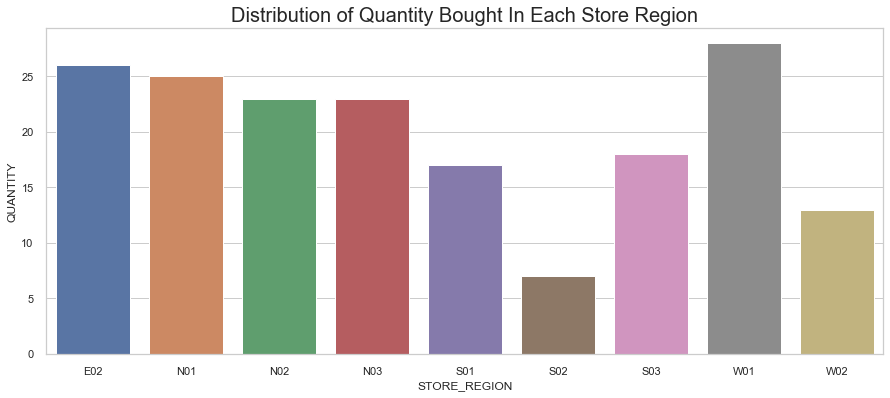

In [102]:
# extracting data for visualization
store_region_vs_quantity_data = dataset_for_exploration[["STORE_REGION","QUANTITY"]]
store_region_vs_quantity_data = store_region_vs_quantity_data.groupby(["STORE_REGION"]).sum().reset_index()
print(store_region_vs_quantity_data)

sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x= "STORE_REGION", y= "QUANTITY", data = store_region_vs_quantity_data)
ax.set_title("Distribution of Quantity Bought In Each Store Region",fontsize = 20)
plt.show()

#### a (2). Store Region vs Quantity vs week day

In [105]:
#exploring weekday data

# extracting data for visualization
week_day_data  = dataset_for_exploration["SHOP_WEEKDAY"].value_counts().rename_axis("SHOP_WEEKDAY").reset_index(name="COUNT")
week_day_data 


,SHOP_WEEKDAY,COUNT
0,Wednesday,41
1,Thursday,28
2,Friday,22
3,Monday,17
4,Tuesday,11


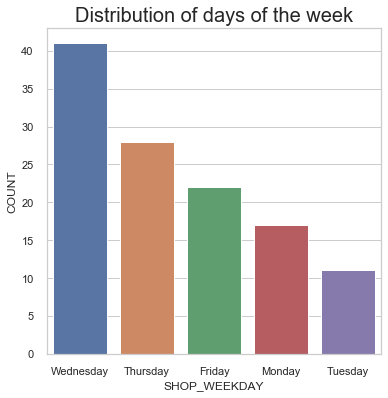

In [107]:
# Visualizing the distribution of week days

sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(x= "SHOP_WEEKDAY", y= "COUNT", data = week_day_data)
ax.set_title("Distribution of days of the week",fontsize = 20)
plt.show()

### Insights:
         Wednesday had the most days followed by thurday
         Tuesday had the least days in that period

   STORE_REGION SHOP_WEEKDAY  QUANTITY
0           E02     Thursday        18
1           E02    Wednesday         8
2           N01       Friday         4
3           N01     Thursday        21
4           N02       Monday        23
5           N03     Thursday         2
6           N03    Wednesday        21
7           S01     Thursday         1
8           S01      Tuesday         3
9           S01    Wednesday        13
10          S02    Wednesday         7
11          S03       Monday         3
12          S03    Wednesday        15
13          W01       Friday        24
14          W01      Tuesday         4
15          W02       Friday         7
16          W02      Tuesday         6


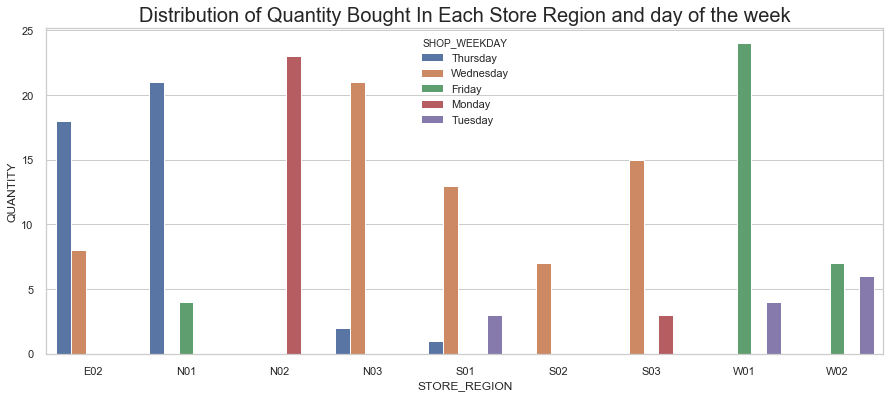

In [59]:
# extracting data for visualization
store_region_vs_quantity_data_and_week_day = dataset_for_exploration[["STORE_REGION","QUANTITY","SHOP_WEEKDAY"]]
store_region_vs_quantity_data_and_week_day = store_region_vs_quantity_data_and_week_day.groupby(["STORE_REGION","SHOP_WEEKDAY"]).sum().reset_index()
print(store_region_vs_quantity_data_and_week_day)

#plotting the bar graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x= "STORE_REGION", y= "QUANTITY",hue= "SHOP_WEEKDAY", data = store_region_vs_quantity_data_and_week_day)
ax.set_title("Distribution of Quantity Bought In Each Store Region and day of the week",fontsize = 20)
plt.show()

#### Insights:

    People in region N02 shopped on Monday only
    In region W01 they shopped on Friday and Tuesday but heavily on Friday
    In region E02 they shopped heavily on Thursday as compare to Werdnesday
    It is only in Shop region S01 they shoped thrice and 
    Shopped once in store region S02 on Wednesday and N02 on Monday

#### a (3). Store Region vs Quantity vs basket size

In [65]:
#exploring basket size
basket_size_data = dataset_for_exploration["BASKET_SIZE"].value_counts().rename_axis("BASKET_SIZE").reset_index(name="COUNT")
basket_size_data

,BASKET_SIZE,COUNT
0,Large,83
1,Medium,30
2,Small,6


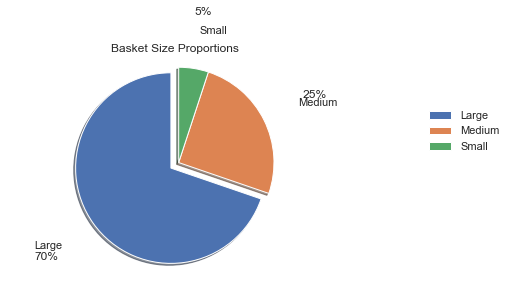

In [97]:
fig, ax = plt.subplots()

#setting font size
plt.rcParams['font.size']=12

#defining the labels
labels = ["Large", "Medium", "Small"]


#setting explode settings
explode=(0.1,0,0)

#Plotting the pie graph
ax.pie(basket_size_data["COUNT"], explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=True, startangle=90,   
       pctdistance=1.6,labeldistance=1.4)

ax.axis('equal')
ax.set_title("Basket Size Proportions")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

### Insights:
         The large baskest were the most used in shoping

   STORE_REGION BASKET_SIZE  QUANTITY
0           E02       Large        18
1           E02      Medium         8
2           N01       Large        21
3           N01      Medium         4
4           N02       Large        23
5           N03       Large        21
6           N03       Small         2
7           S01       Large        13
8           S01      Medium         3
9           S01       Small         1
10          S02      Medium         7
11          S03       Large        14
12          S03      Medium         3
13          S03       Small         1
14          W01       Large        24
15          W01      Medium         4
16          W02      Medium        11
17          W02       Small         2


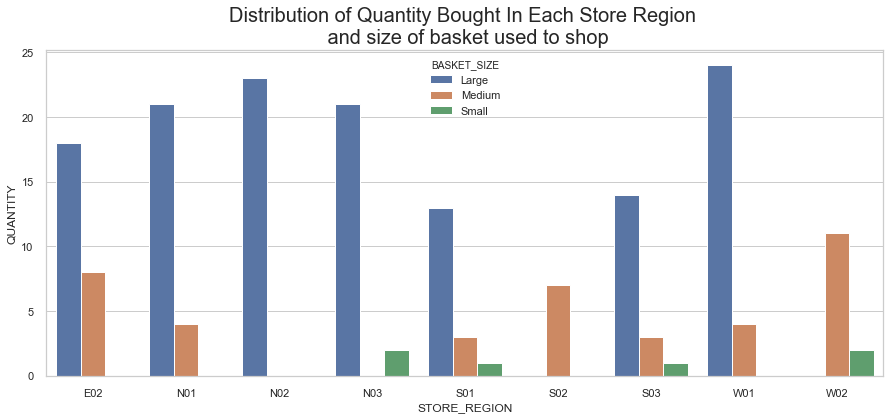

In [63]:
# extracting data for visualization
store_region_vs_quantity_data_and_basket_size= dataset_for_exploration[["STORE_REGION","QUANTITY","BASKET_SIZE"]]
store_region_vs_quantity_data_and_basket_size = store_region_vs_quantity_data_and_basket_size.groupby(["STORE_REGION","BASKET_SIZE"]).sum().reset_index()
print(store_region_vs_quantity_data_and_basket_size)

#plotting the bar graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x= "STORE_REGION", y= "QUANTITY",hue= "BASKET_SIZE", data = store_region_vs_quantity_data_and_basket_size)
ax.set_title("Distribution of Quantity Bought In Each Store Region \n and size of basket used to shop",fontsize = 20)
plt.show()

### Insights:
        The large basket was mostly used followed by medium then small
        A medium basket size was used in store region S02
        A large basket size was used in store region N02
        The large basket size was used in mostv regions as compared to the other basket sizes
        

#### a (4). Store Region vs Quantity vs shop hour

In [108]:
#exploring shop hour
shop_hour_data = dataset_for_exploration["SHOP_HOUR"].value_counts().rename_axis("SHOP_HOUR").reset_index(name="COUNT")
shop_hour_data

,SHOP_HOUR,COUNT
0,15,31
1,8,19
2,13,16
3,9,16
4,20,15
5,19,8
6,12,6
7,16,4
8,10,4


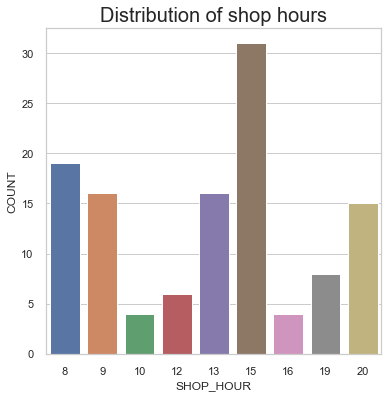

In [110]:
# Visualizing the distribution of shop hour

sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(x= "SHOP_HOUR", y= "COUNT", data = shop_hour_data )
ax.set_title("Distribution of shop hours",fontsize = 20)
plt.show()

### Insights:
         The supermarket seems to be so busy at 3pm and les busy at 10 am.
         The supermarket is busy between:
                 8 am and 10 am
                 12 noon and 4 pm
                 7 pm and 8 pm

   STORE_REGION  SHOP_HOUR  QUANTITY
0           E02         19         8
1           E02         20        18
2           N01          8        21
3           N01         19         4
4           N02          9        23
5           N03         15        23
6           S01         10         3
7           S01         13        13
8           S01         16         1
9           S02         20         7
10          S03         10         3
11          S03         12        14
12          S03         13         1
13          W01         15        28
14          W02          8         2
15          W02         13         6
16          W02         16         5


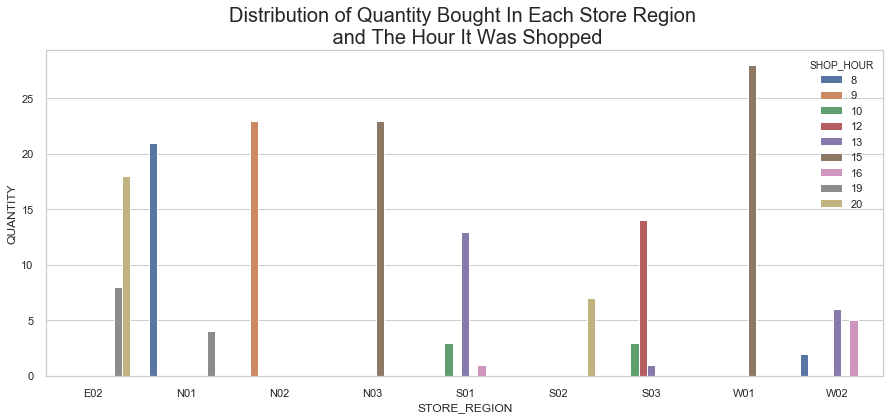

In [120]:
# extracting data for visualization
store_region_vs_quantity_data_and_shop_hour= dataset_for_exploration[["STORE_REGION","QUANTITY","SHOP_HOUR"]]
store_region_vs_quantity_data_and_shop_hour = store_region_vs_quantity_data_and_shop_hour.groupby(["STORE_REGION","SHOP_HOUR"]).sum().reset_index()
print(store_region_vs_quantity_data_and_shop_hour)

#plotting the bar graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x= "STORE_REGION", y= "QUANTITY",hue= "SHOP_HOUR", data = store_region_vs_quantity_data_and_shop_hour)
ax.set_title("Distribution of Quantity Bought In Each Store Region \n and The Hour It Was Shopped",fontsize = 20)
plt.show()

### Insights:
    In region E02 customers shopped between 7 pm to 8 pm
    In region N01 customers shopped at 8 am and 7 pm
    In region N02 cutomers shopped at  9 am
    In region N03 cutomers shopped at  3 pm
    In region S01 cutomers shopped at  10 am, 1 pm and 4 pm
    In region S02 cutomers shopped at  8 pm
    In region S03 cutomers shopped at  10 am, 12 noon and 3 pm
    In region W01 cutomers shopped at  3 pmIn region S01 cutomers shopped at  10 am, 1pm and 4pm
    In region W02 cutomers shopped at  8 am, 1pm and 4pm
    
    The largest quantity  bought was at store region W01 at 3 pm and the smallest at store region S01 at 4 pm and at store     region S03 at 1 pm
    

In [121]:
dataset_for_exploration.columns

Index(['Date', 'QUANTITY', 'SPEND', 'SHOP_WEEKDAY', 'SHOP_HOUR',
       'PROD_CODE_10', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_SIZE', 'BASKET_DOMINANT_MISSION', 'STORE_FORMAT',
       'STORE_REGION'],
      dtype='object')

#### a (5). Store Region vs Quantity vs customer price sensitivity

In [123]:
#exploring customer price sensitivity
customer_price_sensitivity_data = dataset_for_exploration["CUST_PRICE_SENSITIVITY"].value_counts().rename_axis("CUST_PRICE_SENSITIVITY").reset_index(name="COUNT")
customer_price_sensitivity_data

,CUST_PRICE_SENSITIVITY,COUNT
0,unclassified,46
1,Less Affluent,42
2,Mid Market,27
3,Up Market,4


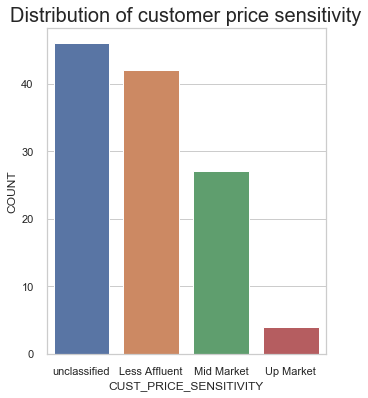

In [125]:
# Visualizing the distribution of customer price sensitivity

sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(5,6))
ax = sns.barplot(x= "CUST_PRICE_SENSITIVITY", y= "COUNT", data = customer_price_sensitivity_data )
ax.set_title("Distribution of customer price sensitivity",fontsize = 20)
plt.show()